# Problem

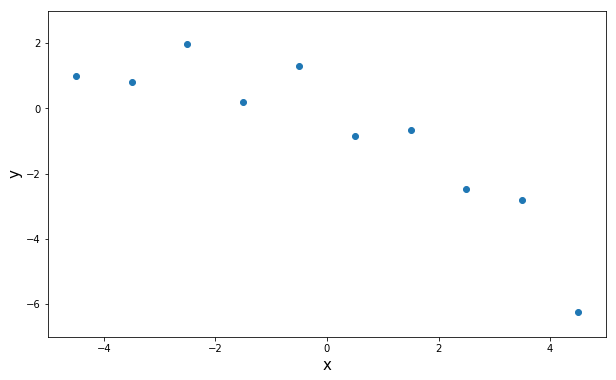

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4.5, 4.5, 10)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-5, 5)
plt.ylim(-7, 3)
plt.show()

In [15]:
import cvxpy as cvx

# MIN(Y_hat - y)^2

In [16]:
x

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

In [17]:
y

array([ 0.9819,  0.7973,  1.9737,  0.1838,  1.318 , -0.8361, -0.6591,
       -2.4701, -2.8122, -6.2512])

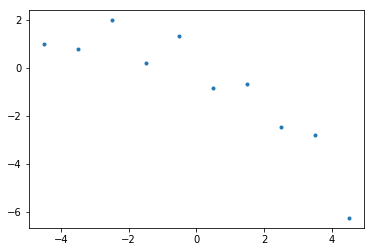

In [19]:
plt.plot(x,y,'.')
plt.show()

In [44]:
X = np.array([x**2, x**1, x**0]).T
y = y.reshape(10, 1)

w = cvx.Variable([3,1])
y_hat = X*w
obj = cvx.sum_squares(y_hat - y)
const = []
optm = cvx.Minimize(obj)
prob = cvx.Problem(optm, const).solve()

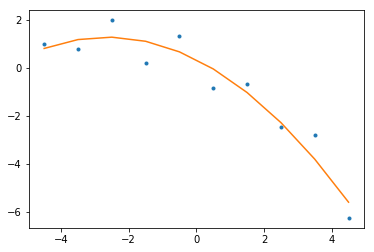

In [45]:
plt.plot(x,y,'.')
plt.plot(x, y_hat.value)
plt.show()

# Solution

loss : 6.148399563559638
loss : 4.4680142052543435
loss : 3.3791748472976186
loss : 2.6379026200777815
loss : 2.1120896316805977
loss : 1.727177149896809
loss : 1.4389437098625337
loss : 1.2197061499293758
loss : 1.0511940920542548
loss : 0.9207735795221769
loss : 0.819373772074521
loss : 0.7402966373344035
loss : 0.6784972602793333
loss : 0.6301244491987205
loss : 0.592212119322915
loss : 0.5624627341229487
loss : 0.5390900755914938
loss : 0.5207022113665417
loss : 0.5062128625145371
loss : 0.4947734973060657


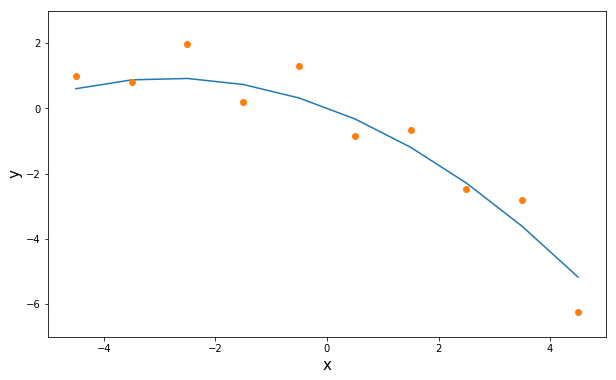

In [2]:
# y_hat = theta[2]*x^2 + theta[1]*x + theta[0]
# gradient descent algorithm
theta = np.array([0.0, 0.0, 0.0])
learning_rate = 7e-7

y_hat = theta[2]*(np.square(x)) + theta[1]*x + theta[0]
loss = np.mean(np.square(y_hat - y))

n_iter = 400000
for i in range(n_iter):
    theta[2] = theta[2] - learning_rate*(np.mean(np.square(x)*(y_hat - y)))
    theta[1] = theta[1] - learning_rate*(np.mean(x*(y_hat - y)))
    theta[0] = theta[0] - learning_rate*(np.mean(y_hat - y))
    
    if i%20000 == 0 :
        y_hat = theta[2]*(np.square(x)) + theta[1]*x + theta[0]
        loss = np.mean(np.square(y_hat - y))
        print("loss : {}".format(loss))

plt.figure(figsize=(10, 6))     
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-5, 5)
plt.ylim(-7, 3)
plt.plot(x, y_hat)
plt.plot(x, y, 'o')
plt.show()

# Solution MatrixForm

$$  \min_{\theta} ~ \lVert \hat y - y \rVert_2  =  \min_{\theta} ~ \lVert A\theta - y \rVert_2  $$

$$ Solution : \theta = (A^TA)^{-1}A^T y $$

$$ \nabla \theta = A^TA\theta - A^Ty$$

loss : 6.14564862749463
loss : 0.8738182061142841
loss : 0.49605449976275445
loss : 0.4544273205546351
loss : 0.44663695059326514
loss : 0.4426244416684154
loss : 0.4393582272822572
loss : 0.4364948448449685
loss : 0.4339625178959661
loss : 0.4317207561189117
loss : 0.42973599931627754
loss : 0.4279787615145697
loss : 0.42642295931698476
loss : 0.4250455015512616
loss : 0.4238259442498709
loss : 0.422746186996105
loss : 0.4217902042587733
loss : 0.4209438075423709
loss : 0.420194434804179
loss : 0.41953096401103557


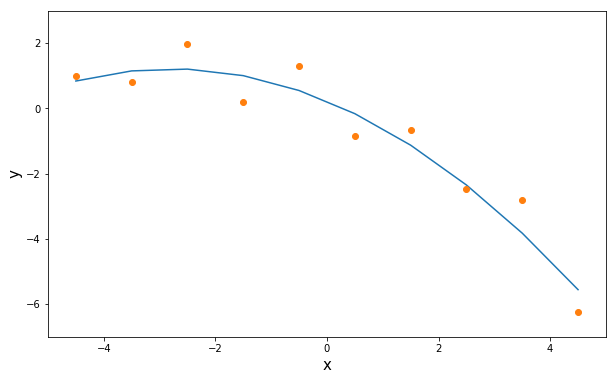

In [3]:
X = np.array([x**2, x**1, x**0]).T
Y = y.reshape([-1,1])

theta = np.array([0.0, 0.0, 0.0])
theta = theta.reshape([3,1])
Y_hat = np.matmul(X, theta)

learning_rate = 7e-7

loss = np.mean(np.square(Y_hat - Y))

n_iter = 400000
for i in range(n_iter):
    grad = np.matmul(np.matmul(X.T, X), theta) - np.matmul(X.T, Y)
  
    theta = theta - learning_rate*grad
    
    if i%20000 == 0 :
        Y_hat = np.matmul(X, theta)
        loss = np.mean(np.square(Y_hat - Y))
        print("loss : {}".format(loss))

plt.figure(figsize=(10, 6))     
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-5, 5)
plt.ylim(-7, 3)
plt.plot(x, Y_hat)
plt.plot(x, Y, 'o')
plt.show()

# Solution CVXPY

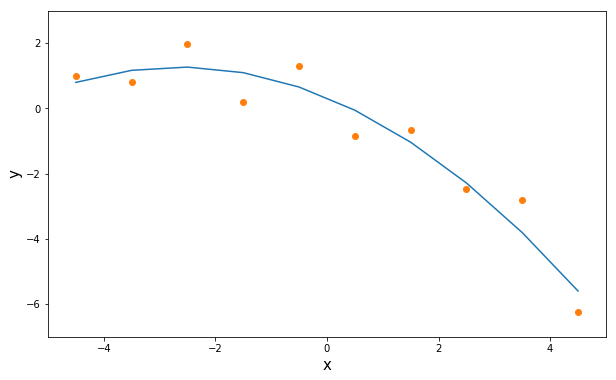

In [4]:
import cvxpy as cvx

X = np.array([x**2, x**1, x**0]).T
Y = y.reshape([-1,1])

X = np.matrix(X)
Y = np.matrix(Y)

theta = cvx.Variable([3,1])

Y_hat = X*theta

loss = cvx.sum_squares(Y_hat - Y)

obj = cvx.Minimize(loss)
const = []
prob = cvx.Problem(obj,const).solve()

# plot
plt.figure(figsize=(10, 6))     
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-5, 5)
plt.ylim(-7, 3)
plt.plot(x, Y_hat.value)
plt.plot(x, Y, 'o')
plt.show()